# Draw the Plot of Temporal Variation TE

In [1]:
%pwd

'/mnt/d/OneDrive - Kyushu University/ESG09_Article/Code'

In [2]:
%cd ..

/mnt/d/OneDrive - Kyushu University/ESG09_Article


## Import Package

In [3]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import os 
import pandas as pd
import seaborn as sns
from shapely.ops import unary_union

### Load Dataset

In [4]:
Df_Filename = os.path.join("Data", "GallupWB_Ml64var1911k14wave_v1.parquet")

In [7]:
Df = pd.read_parquet(Df_Filename)

In [8]:
Df['wave'] = Df['wave'] + 2005

In [9]:
grouped_mean = Df.groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


In [10]:
grouped_mean_yo = Df[Df['Age']<40].groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


In [11]:
grouped_mean_ma = Df[(Df['Age'] > 40)&(Df['Age'] <= 65)].groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


In [12]:
grouped_mean_el = Df[Df['Age'] > 65].groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


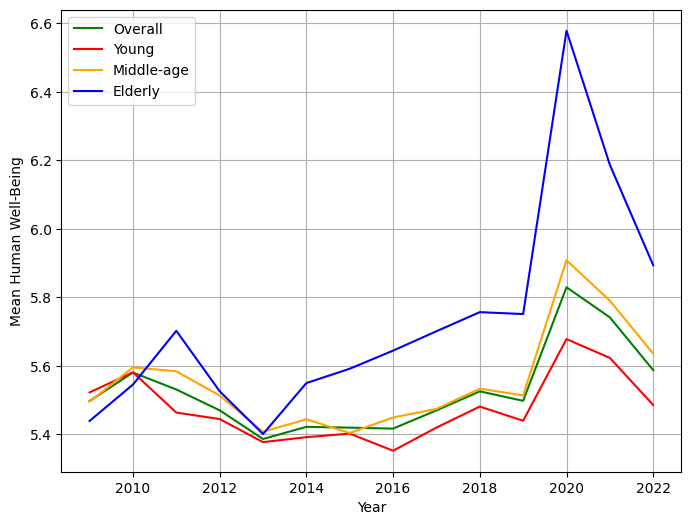

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(list(range(2009, 2023)), grouped_mean, color='g', label='Overall')
plt.plot(list(range(2009, 2023)), grouped_mean_yo, color='r', label='Young')
plt.plot(list(range(2009, 2023)), grouped_mean_ma, color='orange', label='Middle-age')
plt.plot(list(range(2009, 2023)), grouped_mean_el, color='b', label='Elderly')
#plt.title('Temporal Variation of Treatment Effects')
plt.xlabel('Year')
plt.ylabel('Mean Human Well-Being')
plt.grid(True)
plt.legend()
plt.savefig('Figures/MeanValueVariation.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Load Wave Dataset and Plot wave

In [7]:
wave_level_df = pd.read_parquet(os.path.join('Results', 'GenderTreatmentWaveDifference_v1.parquet'))

In [8]:
wave_level_df.head(20)

0         1          2              3         4          5   \
0    4  0.131343  14.780731   2.205153e-49  0.121869  12.690711   
1    5  0.142227  17.585306   3.863765e-69  0.135530  15.314045   
2    6  0.146068  21.158724   3.048652e-99  0.145927  19.453688   
3    7  0.151341  22.838082  2.771309e-115  0.148693  20.470266   
4    8  0.177901  22.437764  2.683760e-111  0.174519  20.575747   
5    9  0.178930  22.914184  5.347987e-116  0.178594  21.241211   
6   10  0.155522  20.127283   5.642270e-90  0.154463  18.618961   
7   11  0.168431  21.588675  3.306310e-103  0.163443  19.748294   
8   12  0.196542  25.545005  1.228792e-143  0.180478  21.994409   
9   13  0.222163  29.331360  1.397348e-188  0.205381  25.607213   
10  14  0.242662  33.495203  3.424190e-245  0.220632  28.250688   
11  15  0.231801  27.976985  1.126545e-171  0.227898  28.720054   
12  16  0.236557  26.419764  2.193887e-153  0.227945  24.344629   
13  17  0.234742  28.356336  2.130535e-176  0.209732  23.594585   

               6         7          8             9         10         11  \
0    7.201139e-37 -0.026066  -2.770835  5.592419e-03 -0.035540  -3.907402   
1    7.038827e-53 -0.012322  -1.426818  1.536349e-01 -0.019019  -2.284541   
2    3.438170e-84 -0.027793  -3.821103  1.329053e-04 -0.027935  -3.914873   
3    5.246784e-93 -0.024271  -3.447183  5.666010e-04 -0.026918  -3.927760   
4    6.568361e-94 -0.047494  -5.736685  9.676334e-09 -0.050876  -6.254967   
5   5.883923e-100 -0.053564  -6.523916  6.872877e-11 -0.053901  -6.732231   
6    2.856969e-77 -0.098700 -12.175629  4.365448e-34 -0.099760 -12.592888   
7    1.111988e-86 -0.114950 -14.181215  1.288297e-45 -0.119939 -15.014954   
8   5.020002e-107 -0.127896 -15.973895  2.172865e-57 -0.143960 -18.194726   
9   2.820255e-144 -0.088944 -11.433092  2.945399e-30 -0.105725 -13.512427   
10  3.913569e-175 -0.056300  -7.485038  7.188065e-14 -0.078330 -10.401533   
11  8.389754e-181 -0.044762  -5.586398  2.323231e-08 -0.048666  -5.932607   
12  1.464811e-130 -0.136413 -14.899532  3.692577e-50 -0.145025 -15.809091   
13  8.175060e-123 -0.138402 -16.096529  3.059063e-58 -0.163412 -19.029307   

              12  
0   9.336150e-05  
1   2.234159e-02  
2   9.048839e-05  
3   8.577428e-05  
4   3.988460e-10  
5   1.677262e-11  
6   2.420553e-36  
7   6.422992e-51  
8   6.858234e-74  
9   1.401011e-41  
10  2.484372e-25  
11  2.989665e-09  
12  3.082636e-56  
13  1.245487e-80

In [10]:
wave_level_df.loc[:, 0] = wave_level_df.loc[:, 0] + 2005

### Draw Plot

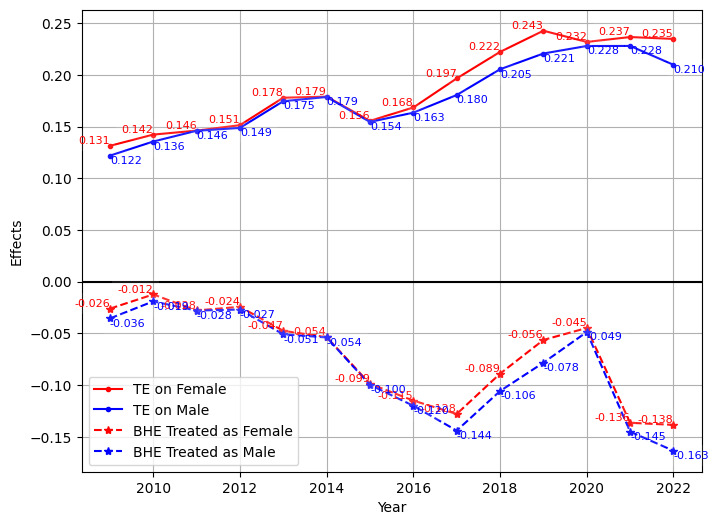

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 1], color='r', label='TE on Female', marker='.')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 4], color='b', label='TE on Male', marker='.')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 7], color='r', label='BHE Treated as Female', linestyle = '--', marker='*')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 10], color='b', label='BHE Treated as Male', linestyle = '--', marker='*')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

for x, y in zip(wave_level_df.loc[:, 0], wave_level_df.loc[:, 1]):
    plt.text(x, y, f'{y:.3f}', fontsize=8, color='r', ha='right', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'))
for x, y in zip(wave_level_df.loc[:, 0], wave_level_df.loc[:, 4]):
    plt.text(x, y, f'{y:.3f}', fontsize=8, color='b', ha='left', va='top', 
             bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'))
for x, y in zip(wave_level_df.loc[:, 0], wave_level_df.loc[:, 7]):
    plt.text(x, y, f'{y:.3f}', fontsize=8, color='r', ha='right', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'))
for x, y in zip(wave_level_df.loc[:, 0], wave_level_df.loc[:, 10]):
    plt.text(x, y, f'{y:.3f}', fontsize=8, color='b', ha='left', va='top', 
             bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'))

#plt.title('Temporal Variation of Treatment Effects')
plt.ylabel('Effects')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.savefig('Figures/MJ_TemporalVariationEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Load Country Dataset and Plot Country

In [13]:
country_level_df = pd.read_parquet(os.path.join('Results', 'GenderTreatmentCountryDifference_v1.parquet'))

In [14]:
country_level_df.head(20)

0         1          2             3         4          5             6   \
0   AFG  0.060357   3.163922  1.560018e-03  0.076340   4.111495  3.953938e-05   
1   AGO  0.134847   2.169876  3.015485e-02  0.161811   2.847546  4.452545e-03   
2   ALB  0.356098  14.143895  4.040876e-45  0.334802  12.013926  4.835456e-33   
3   ARE  0.131374   8.927807  4.843385e-19  0.092744   7.376047  1.688947e-13   
4   ARG  0.291583  16.812227  6.919691e-63  0.288238  14.573441  1.101948e-47   
5   ARM  0.228624  11.047260  2.859903e-28  0.207597   7.766726  8.907286e-15   
6   AUS  0.243260  13.833873  3.225636e-43  0.236148  12.446662  2.604806e-35   
7   AUT  0.179098  13.492800  3.004730e-41  0.139263   9.737744  2.498901e-22   
8   AZE  0.002409   0.120321  9.042310e-01 -0.002445  -0.117533  9.064399e-01   
9   BDI -0.020582  -0.693580  4.879879e-01  0.039956   1.305928  1.916591e-01   
10  BEL  0.141086   9.723693  2.831348e-22  0.107320   7.424705  1.206318e-13   
11  BEN -0.012670  -0.668178  5.040347e-01 -0.053944  -3.089516  2.009236e-03   
12  BFA  0.002963   0.185226  8.530553e-01 -0.008931  -0.661658  5.082019e-01   
13  BGD  0.353062  20.220425  6.794880e-90  0.343962  19.071961  3.609239e-80   
14  BGR  0.080430   3.584816  3.383367e-04  0.079093   3.108981  1.881922e-03   
15  BHR  0.258293  11.783524  7.781685e-32  0.255363  13.735527  1.180598e-42   
16  BIH  0.226821  10.235634  1.675749e-24  0.202438   8.164084  3.581202e-16   
17  BLR  0.074736   4.232781  2.324771e-05  0.052625   2.569705  1.019515e-02   
18  BLZ  0.198840   2.140817  3.275857e-02  0.182458   1.807306  7.139439e-02   
19  BOL  0.152406  11.004962  4.650536e-28  0.168331  11.370431  8.348258e-30   

          7          8             9         10         11            12  
0  -0.171223  -9.072694  1.317877e-19 -0.155240  -8.270340  1.458542e-16  
1  -0.166712  -2.774914  5.578416e-03 -0.139748  -2.376354  1.758824e-02  
2  -0.201814  -7.535799  5.179454e-14 -0.223111  -8.373691  6.161413e-17  
3   0.014477   1.112368  2.659946e-01 -0.024152  -1.668471  9.523934e-02  
4  -0.171252  -9.420688  5.186887e-21 -0.174597  -9.094564  1.078507e-19  
5  -0.076891  -3.235995  1.215315e-03 -0.097918  -4.039173  5.395684e-05  
6  -0.063942  -3.526118  4.233155e-04 -0.071054  -3.821358  1.334075e-04  
7  -0.038743  -2.891303  3.842504e-03 -0.078579  -5.525351  3.348173e-08  
8  -0.075599  -3.761345  1.700051e-04 -0.080454  -3.874183  1.076926e-04  
9  -0.107445  -3.343496  8.354675e-04 -0.046907  -1.676099  9.380276e-02  
10 -0.125611  -9.190435  4.513382e-20 -0.159377 -10.393967  3.331907e-25  
11 -0.137800  -7.593609  3.350296e-14 -0.179074  -9.787793  1.553601e-22  
12 -0.034073  -2.183408  2.902594e-02 -0.045967  -3.326450  8.823543e-04  
13  0.038587   2.065245  3.891536e-02  0.029488   1.750405  8.006704e-02  
14 -0.282716 -11.920294  1.347809e-32 -0.284052 -11.602196  5.617423e-31  
15 -0.141815  -7.089163  1.425856e-12 -0.144745  -6.988908  2.918857e-12  
16 -0.143847  -6.323567  2.641941e-10 -0.168230  -6.946398  3.930740e-12  
17 -0.163375  -8.540077  1.526201e-17 -0.185486  -9.590490  1.075068e-21  
18 -0.046819  -0.472407  6.368520e-01 -0.063202  -0.667201  5.049659e-01  
19 -0.205504 -14.662501  2.659504e-48 -0.189579 -12.846510  1.501291e-37

### Draw Plot: TE

In [15]:
country_level_df_heatmap = country_level_df.iloc[:,[0,1,4,7,10]]

In [16]:
country_level_df_heatmap.columns = ['Country', 'TE on Female', 'TE on Male',
                                   'BHE Treated as Female', 'BHE Treated as Male']
country_level_df_heatmap = country_level_df_heatmap.set_index('Country')

In [17]:
country_level_df_heatmap.head()

TE on Female  TE on Male  BHE Treated as Female  BHE Treated as Male
Country                                                                      
AFG          0.060357    0.076340              -0.171223            -0.155240
AGO          0.134847    0.161811              -0.166712            -0.139748
ALB          0.356098    0.334802              -0.201814            -0.223111
ARE          0.131374    0.092744               0.014477            -0.024152
ARG          0.291583    0.288238              -0.171252            -0.174597

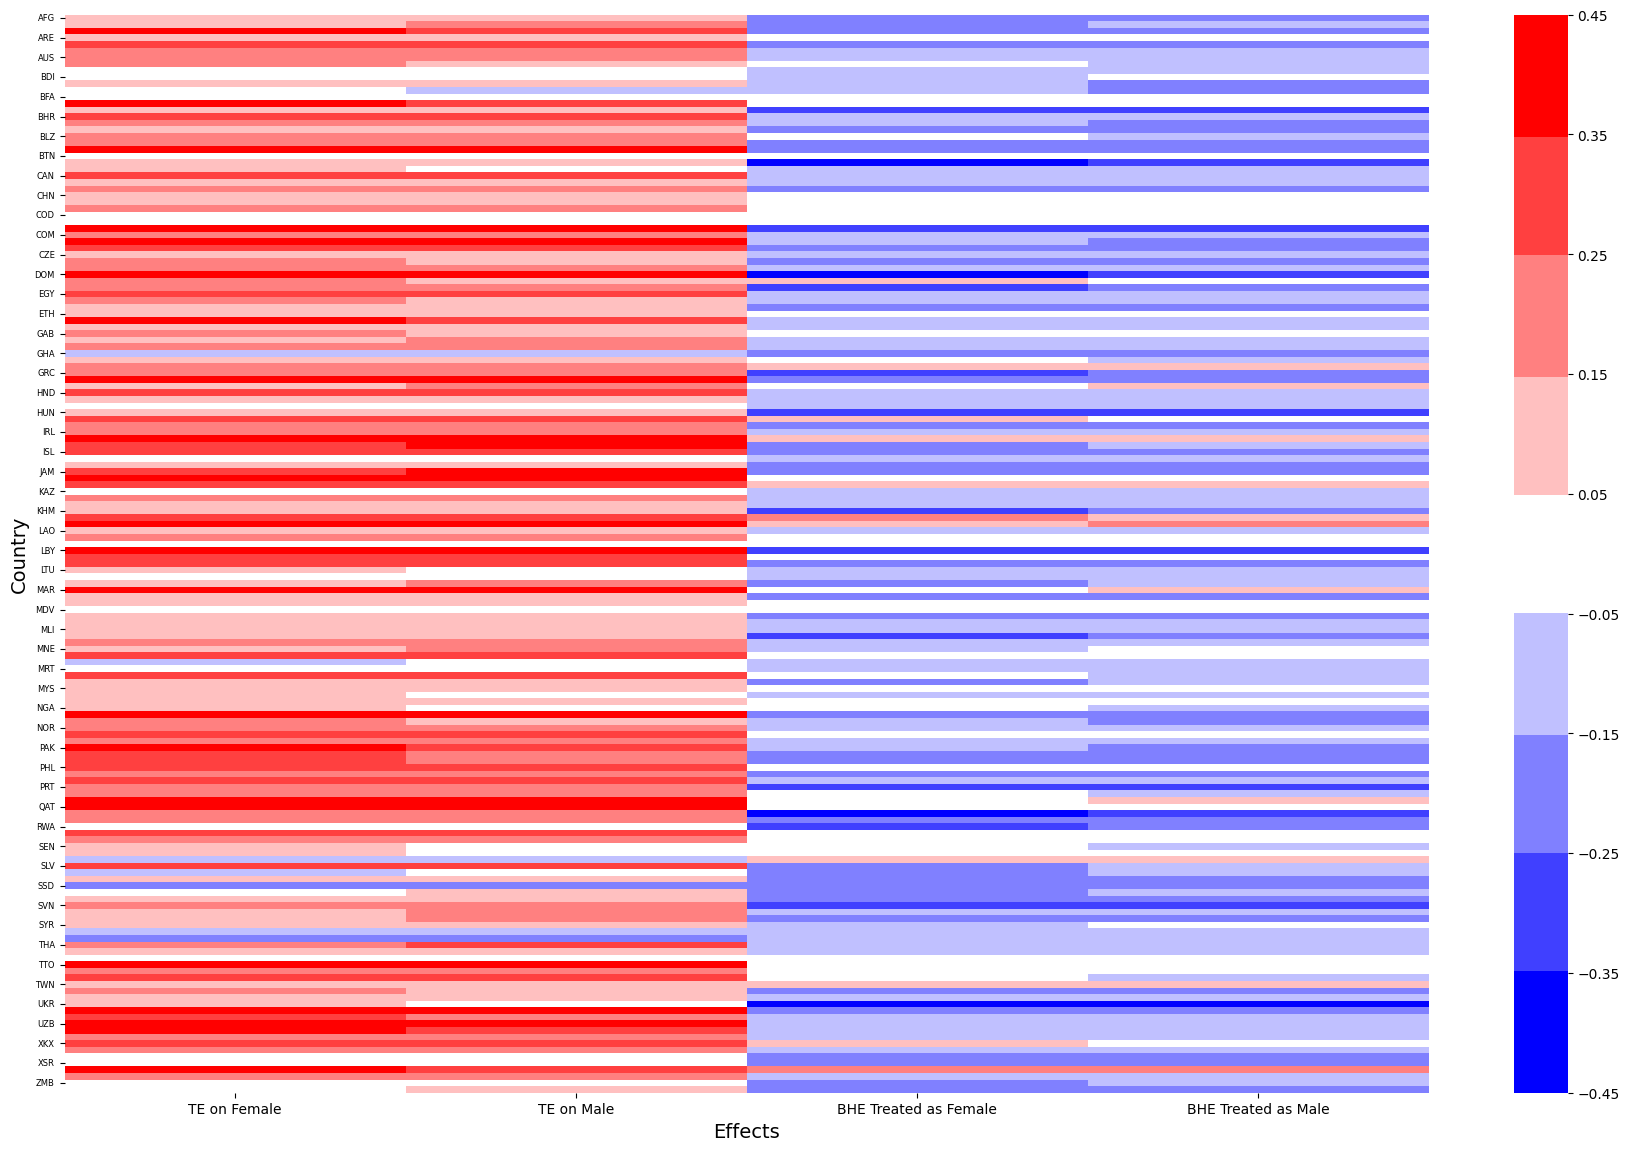

In [41]:
vmin = np.min(country_level_df_heatmap)
vmax = np.max(country_level_df_heatmap)

abs_max = max(abs(vmin), abs(vmax))
vmin, vmax = -0.45, 0.45

colors = ['#0000FF', '#4040FF', '#8080FF', '#C0C0FF', 'white', '#FFC0C0', '#FF8080', '#FF4040', '#FF0000']
n_bins = len(colors)
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

plt.figure(figsize=(22, 14))

sns.heatmap(country_level_df_heatmap, 
            cmap=cmap, 
            center=0, 
            vmin=vmin, 
            vmax=vmax, 
            annot=False,
            cbar_kws={'ticks': np.linspace(vmin, vmax, 10)})

plt.xlabel('Effects', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.yticks(fontsize=6)

plt.show();

### Mapping BHE and TE

In [18]:
country_gdf = gpd.read_file('Data/globalShp/World_Countries_Generalized_1984.shp')

In [19]:
country_gdf = country_gdf[['COUNTRY', 'Alpha_3_co', 'geometry']]

In [20]:
country_gdf = country_gdf.set_index('Alpha_3_co')

In [21]:
country_gdf = country_gdf.groupby(country_gdf.index).geometry.apply(unary_union)

In [22]:
country_gdf = gpd.GeoDataFrame(country_gdf)

In [24]:
country_gdf = country_gdf.merge(country_level_df_heatmap, left_index = True, right_index = True, how = 'left')

In [25]:
country_gdf = country_gdf.set_crs('4326')

In [26]:
country_gdf.describe()

TE on Female  TE on Male  BHE Treated as Female  BHE Treated as Male
count    158.000000  158.000000             158.000000           158.000000
mean       0.175068    0.174671              -0.106970            -0.107368
std        0.151598    0.153754               0.106670             0.102644
min       -0.180794   -0.194670              -0.434498            -0.362295
25%        0.075158    0.072941              -0.174954            -0.175957
50%        0.156536    0.159938              -0.106590            -0.103071
75%        0.275624    0.271835              -0.038524            -0.043404
max        0.707288    0.682007               0.246735             0.202927

In [28]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","green", 'white',"yellow","red"])

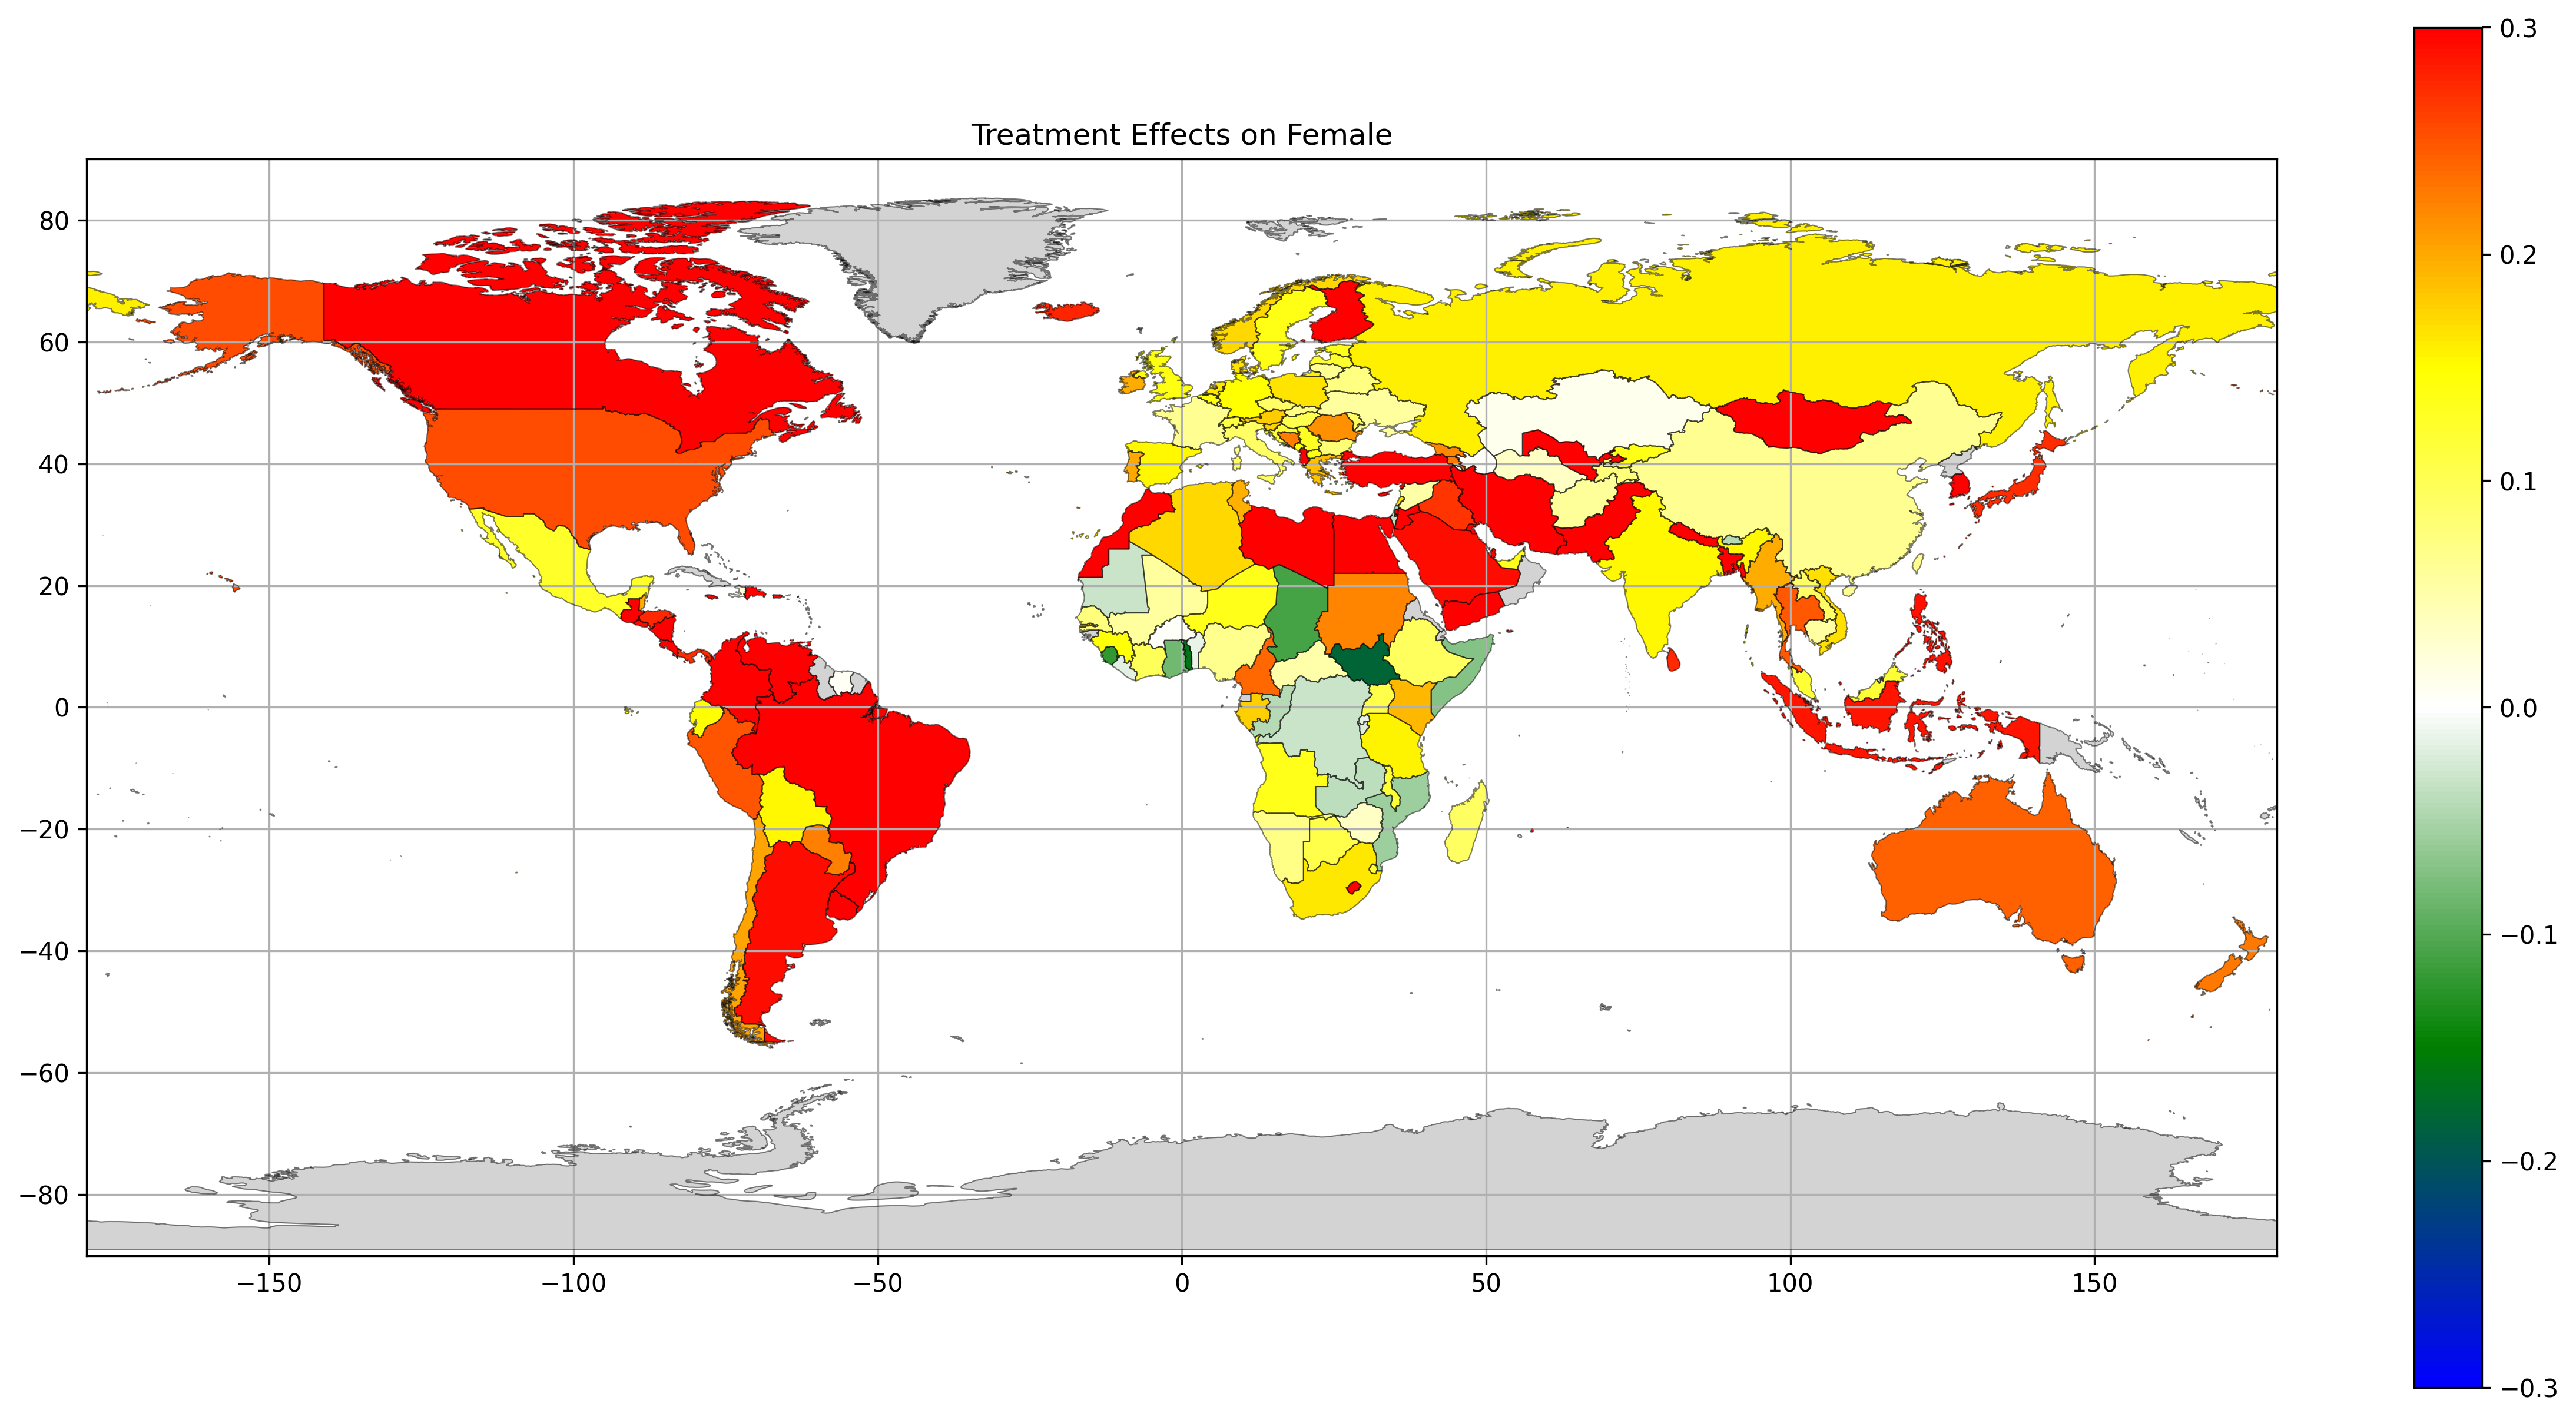

In [32]:
fig = plt.figure(figsize = (20, 10), dpi = 300)
ax = plt.axes()
country_gdf.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.5, linewidth=0.5)
country_gdf.plot(column = 'TE on Female', ax = ax, legend = True, vmax = 0.3, vmin = -0.3, cmap = cmap, missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title('Treatment Effects on Female')
plt.show()
fig = plt.figure(figsize = (20, 10), dpi = 300)
ax = plt.axes()
country_gdf.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.5, linewidth=0.5)
country_gdf.plot(column = 'TE on Male', ax = ax, legend = True, vmax = 0.3, vmin = -0.3, cmap = cmap, missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title('Treatment Effects on Male')
plt.show()
fig = plt.figure(figsize = (20, 10), dpi = 300)
ax = plt.axes()
country_gdf.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.5, linewidth=0.5)
country_gdf.plot(column = 'BHE Treated as Female', ax = ax, legend = True, vmax = 0.3, vmin = -0.3, cmap = cmap, missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title('Base Heterogenuous Effects Treated as Female')
plt.show()
fig = plt.figure(figsize = (20, 10), dpi = 300)
ax = plt.axes()
country_gdf.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.5, linewidth=0.5)
country_gdf.plot(column = 'BHE Treated as Male', ax = ax, legend = True, vmax = 0.3, vmin = -0.3, cmap = cmap, missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title('Base Heterogenuous Effects Treated as Male')
plt.show()

/tmp/ipykernel_10029/1729957987.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space for the color bar on the right


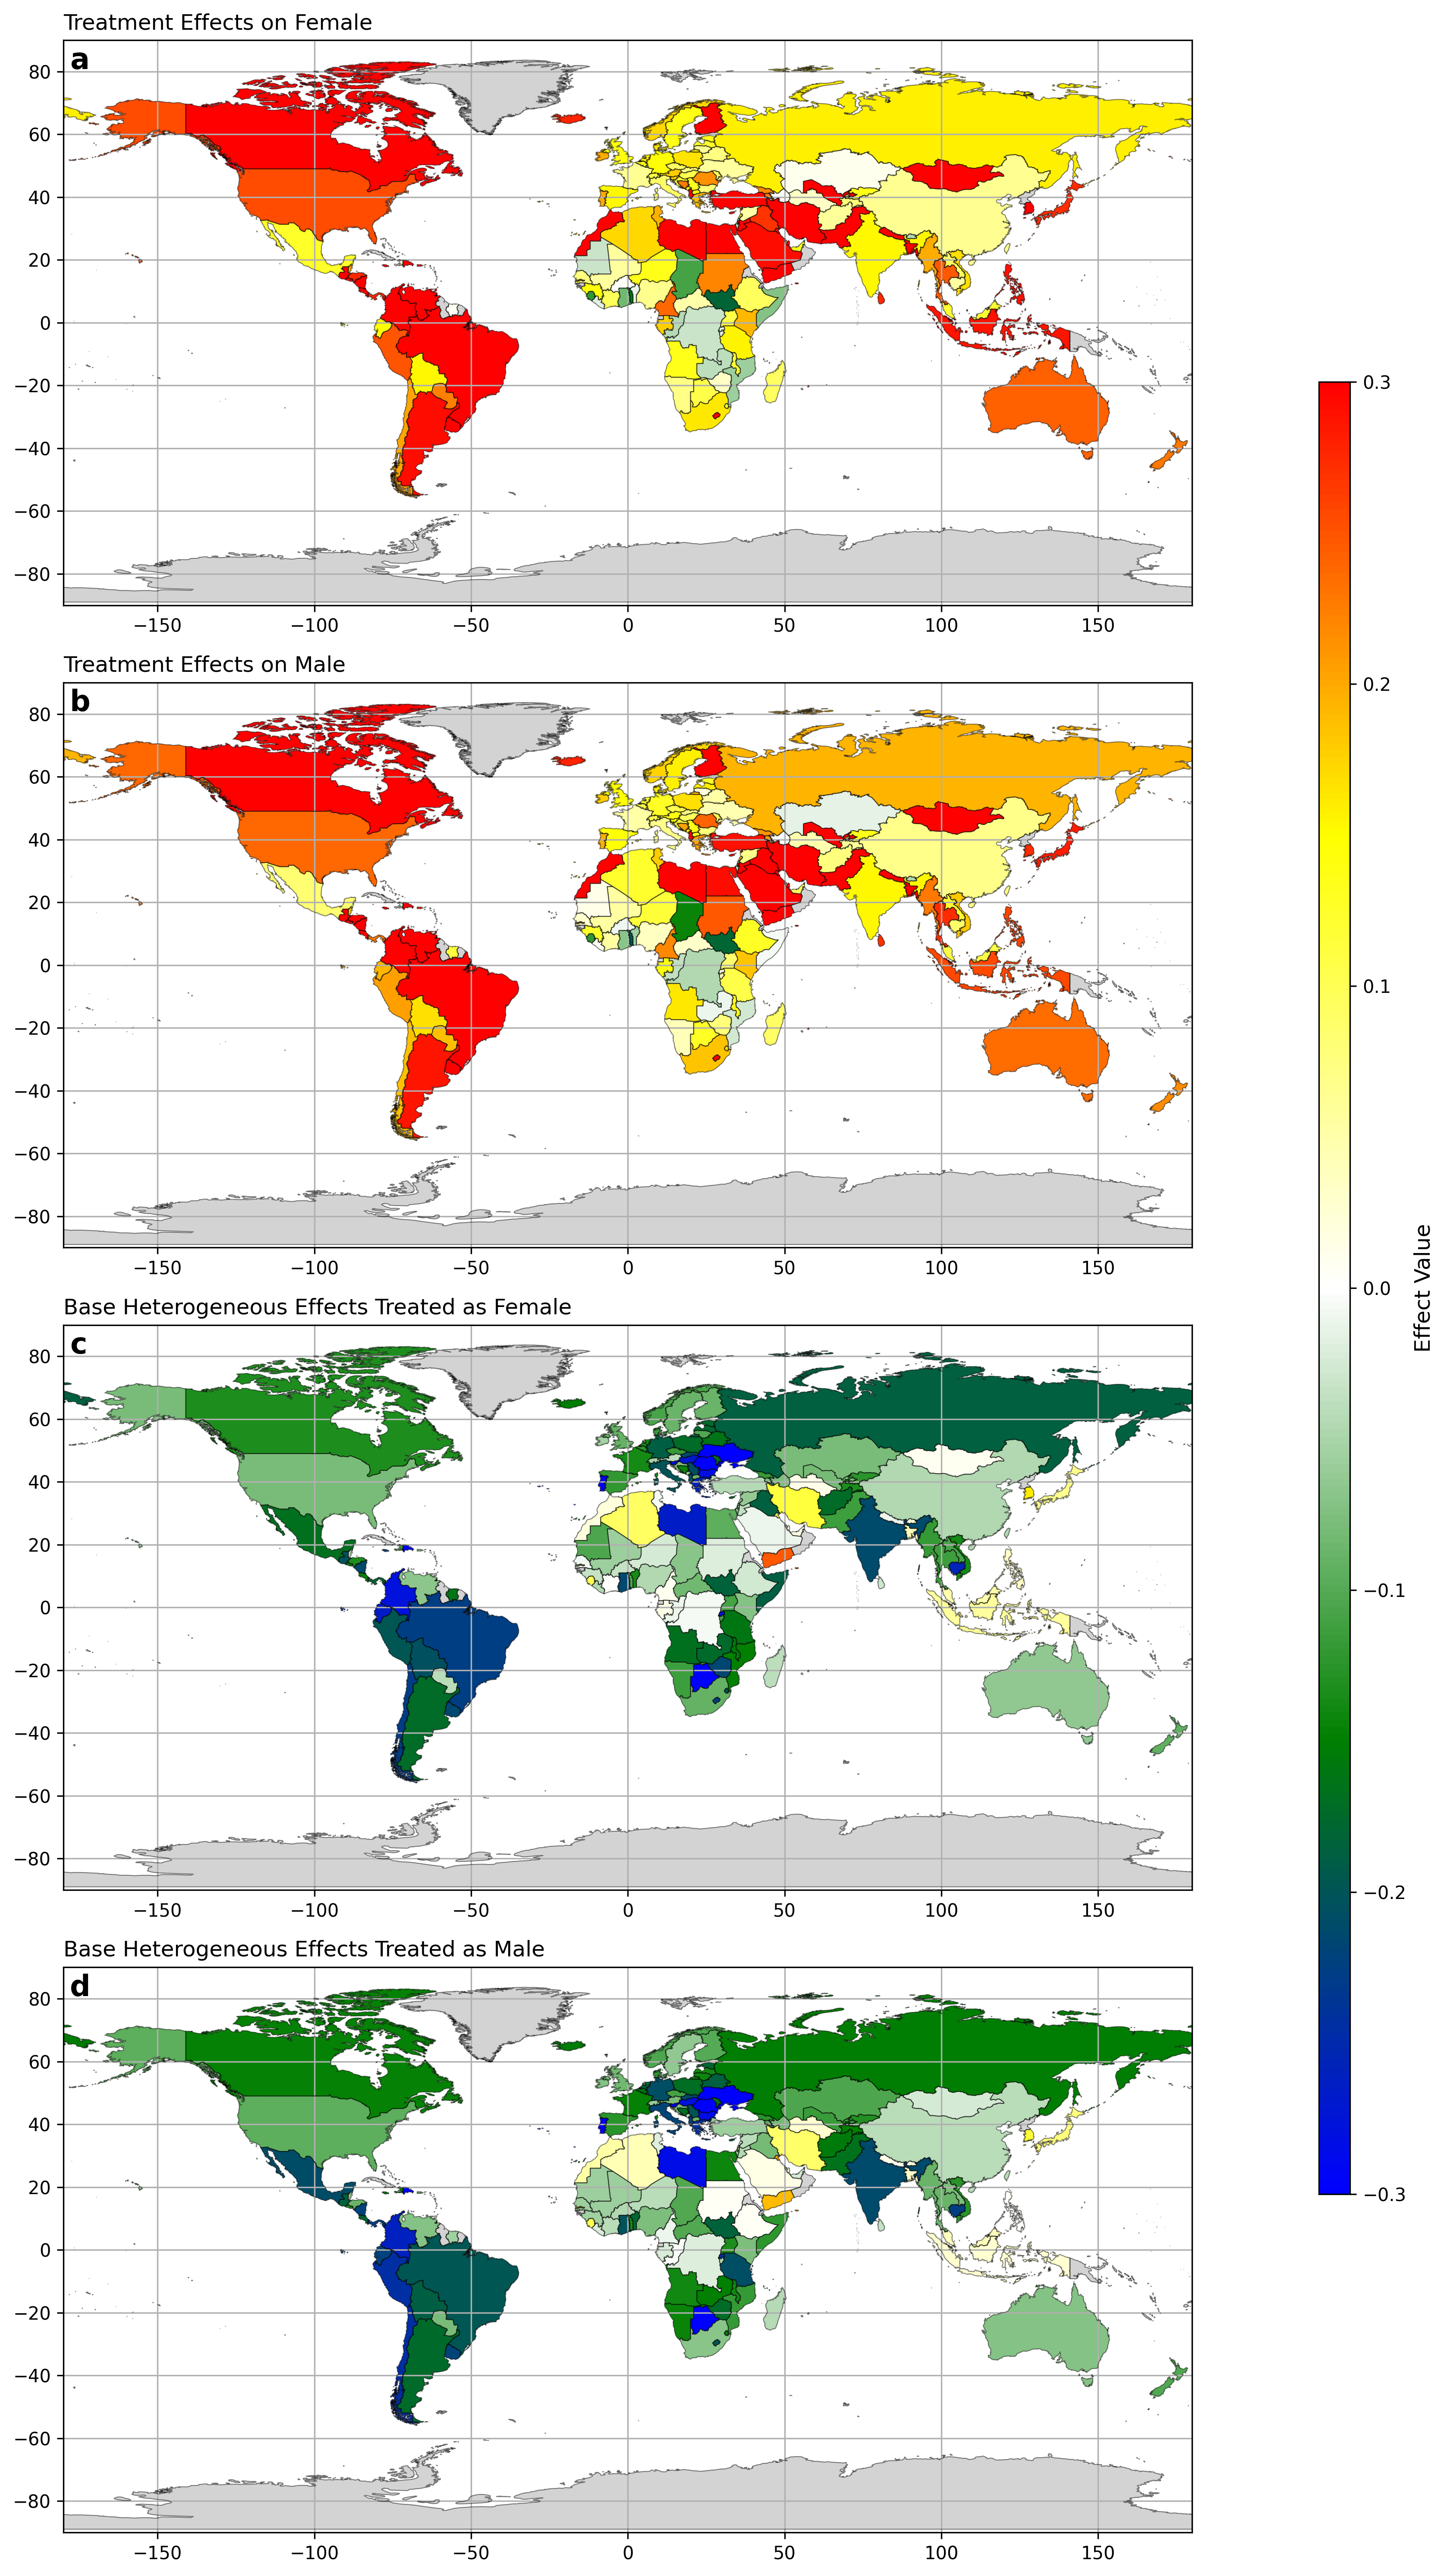

In [43]:
fig, axes = plt.subplots(4, 1, figsize=(12, 20), dpi=300)  # 4 rows, 1 column

vmin = -0.3
vmax = 0.3

# Plot 1: Treatment Effects on Female
country_gdf.boundary.plot(ax=axes[0], edgecolor='black', alpha=0.5, linewidth=0.5)
plot1 = country_gdf.plot(column='TE on Female', ax=axes[0], legend=False, vmax=vmax, vmin=vmin, cmap=cmap, 
                         missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
axes[0].set_title('Treatment Effects on Female', loc='left', fontsize=12)
axes[0].grid(True)
axes[0].set_xlim(-180, 180)
axes[0].set_ylim(-90, 90)
axes[0].text(-178, 88, 'a', fontsize=16, fontweight='bold', va='top', ha='left') 

# Plot 2: Treatment Effects on Male
country_gdf.boundary.plot(ax=axes[1], edgecolor='black', alpha=0.5, linewidth=0.5)
plot2 = country_gdf.plot(column='TE on Male', ax=axes[1], legend=False, vmax=vmax, vmin=vmin, cmap=cmap, 
                         missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
axes[1].set_title('Treatment Effects on Male', loc='left', fontsize=12)
axes[1].grid(True)
axes[1].set_xlim(-180, 180)
axes[1].set_ylim(-90, 90)
axes[1].text(-178, 88, 'b', fontsize=16, fontweight='bold', va='top', ha='left') 

# Plot 3: Base Heterogeneous Effects Treated as Female
country_gdf.boundary.plot(ax=axes[2], edgecolor='black', alpha=0.5, linewidth=0.5)
plot3 = country_gdf.plot(column='BHE Treated as Female', ax=axes[2], legend=False, vmax=vmax, vmin=vmin, cmap=cmap, 
                         missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
axes[2].set_title('Base Heterogeneous Effects Treated as Female', loc='left', fontsize=12)
axes[2].grid(True)
axes[2].set_xlim(-180, 180)
axes[2].set_ylim(-90, 90)
axes[2].text(-178, 88, 'c', fontsize=16, fontweight='bold', va='top', ha='left')

# Plot 4: Base Heterogeneous Effects Treated as Male
country_gdf.boundary.plot(ax=axes[3], edgecolor='black', alpha=0.5, linewidth=0.5)
plot4 = country_gdf.plot(column='BHE Treated as Male', ax=axes[3], legend=False, vmax=vmax, vmin=vmin, cmap=cmap, 
                         missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
axes[3].set_title('Base Heterogeneous Effects Treated as Male', loc='left', fontsize=12)
axes[3].grid(True)
axes[3].set_xlim(-180, 180)
axes[3].set_ylim(-90, 90)
axes[3].text(-178, 88, 'd', fontsize=16, fontweight='bold', va='top', ha='left')

# Add a single color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Effect Value', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space for the color bar on the right

# Save the figure if needed
fig.savefig('Figures/MJ_MultiPanelTEandBHE_SingleColorBar_Column.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()